# WEB APIs AND CLASSIFICATION-2

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from scipy import sparse
from collections import Counter
import ast
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import regex as re
from bs4 import BeautifulSoup
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

### Loading Scraped Data

In [5]:
diet_df = pd.read_csv('dietDataFrame.csv',index_col = 0)
diet_df['data'] = diet_df['data'].map(lambda x: ast.literal_eval(x))


In [6]:
exercise_df = pd.read_csv('exerciseDataFrame.csv', index_col=0)
exercise_df['data'] = exercise_df['data'].map(lambda x: ast.literal_eval(x))

### Show dataframes

In [7]:
# to display all the rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
diet_df.head()


data kind  \
0  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
1  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
2  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
3  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
4  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   

                                               title  \
0                           Join our Discord server!   
1  These sattvic foods are amazing to gain streng...   
2  You don’t need to eliminate gluten from your d...   
3               How to lose the rest of my belly fat   
4  Can someone explain my curent 'diet' plan? ful...   

                                            selftext subreddit  
0  Hey guys! r/diet is undergoing a refresh, and ...      diet  
1                                                NaN      diet  
2  The times you want to avoid gluten are when yo...      diet  
3  I’ve been dieting for months now and working o...      diet  
4  Backstory: I have been trying to lose weight f...      diet

In [9]:
exercise_df.head()

data kind  \
0  {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
1  {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
2  {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
3  {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
4  {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   

                                               title  \
0  PLEASE READ BEFORE POSTING. Covering health be...   
1  Sitting all day at work? Anterior Pelvic tilt ...   
2    The Ultimate Guide to Cobra Pose (Bhujangasana)   
3                                               HELP   
4  Transitioning from zero exercise to hitting th...   

                                            selftext subreddit  
0  Covering health benefits, and various forms an...  Exercise  
1                                                NaN  Exercise  
2                                                NaN  Exercise  
3  Hi! I need help finding a guide for women that...  Exercise  
4  My schedule right now consists of weight lifti...  Exercise

### Checking the number of rows of the two dataframes

In [10]:
diet_df.shape

(990, 5)

In [11]:
exercise_df.shape

(991, 5)

## Removing Duplicated Rows

While scraping the data from the reddit, there will be chances of scraping the same rows. 
So, we need to drop those duplicated rows.

In [12]:
diet_df.drop_duplicates(subset = [ 'title','selftext','subreddit'], keep = 'first', inplace = True)
exercise_df.drop_duplicates(subset = ['title','selftext','subreddit'], keep = 'first', inplace = True)

In [13]:
diet_df.shape

(990, 5)

In [14]:
exercise_df.shape

(914, 5)

We can see the number of rows were reduced in exercise dataframe from 991 to 914 rows. 

### Check the null Values in all the columns of the two dataframes

In [15]:
diet_df.isnull().sum()

data           0
kind           0
title          0
selftext     101
subreddit      0
dtype: int64

In [16]:
exercise_df.isnull().sum()

data           0
kind           0
title          0
selftext     424
subreddit      0
dtype: int64

### Insights:
Can see more number of selftext data is null. Dropping those rows will lead us to lose a lot of data.
Replacing those null values with the title will help us to classify.

In [17]:
diet_df['selftext'] = diet_df['selftext'].combine_first(diet_df['title'])

In [18]:
diet_df

data kind  \
0    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
1    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
2    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
3    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
4    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
5    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
6    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
7    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
8    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
9    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
10   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
11   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
12   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
13   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
14   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
15   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
16   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
17   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
18   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
19   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
20   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
21   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
22   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
23   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
24   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
25   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
26   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
27   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
28   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
29   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
30   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
31   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
32   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
33   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
34   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
35   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
36   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
37   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
38   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
39   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
40   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
41   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
42   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
43   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
44   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
45   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
46   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
47   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
48   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
49   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
50   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
51   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
52   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
53   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
54   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
55   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
56   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
57   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
58   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
59   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
60   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
61   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
62   {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
63   {'approved_at

In [19]:
diet_df.isnull().sum()

data         0
kind         0
title        0
selftext     0
subreddit    0
dtype: int64

 
We can see all the columns have zero null values. Below, we will change the null values of exercise_df.

In [20]:
exercise_df['selftext'] = exercise_df['selftext'].combine_first(exercise_df['title'])

In [21]:
exercise_df

data kind  \
0    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
1    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
2    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
3    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
4    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
5    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
6    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
7    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
8    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
9    {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
10   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
11   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
12   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
13   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
14   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
15   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
16   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
17   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
18   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
19   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
20   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
21   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
22   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
23   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
24   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
25   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
26   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
27   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
28   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
29   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
30   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
31   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
32   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
33   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
34   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
35   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
36   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
37   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
38   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
39   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
40   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
41   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
42   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
43   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
44   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
45   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
46   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
47   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
48   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
49   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
50   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
51   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
52   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
53   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
54   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
55   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
56   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
57   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
58   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
59   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
60   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
61   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
62   {'approved_at_utc': None, 'subreddit': 'Exerci...   t3   
63   {'approved_at

In [22]:
exercise_df.isnull().sum()

data         0
kind         0
title        0
selftext     0
subreddit    0
dtype: int64

### Insights:
Thus, we cleaned all the null values as some models might not accept rows with null values.Replacing it with title  value might not affect the model prediction.   

In [23]:
diet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Data columns (total 5 columns):
data         990 non-null object
kind         990 non-null object
title        990 non-null object
selftext     990 non-null object
subreddit    990 non-null object
dtypes: object(5)
memory usage: 46.4+ KB


In [24]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 914
Data columns (total 5 columns):
data         914 non-null object
kind         914 non-null object
title        914 non-null object
selftext     914 non-null object
subreddit    914 non-null object
dtypes: object(5)
memory usage: 42.8+ KB


Since all the columns has text and hence they are of object type.

### Joining two data Frames 

In [25]:
final_df = pd.concat([diet_df, exercise_df], axis = 0, join = 'outer',ignore_index= False)

In [26]:
final_df = final_df.reset_index(drop = True)
final_df

data kind  \
0     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
1     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
2     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
3     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
4     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
5     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
6     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
7     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
8     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
9     {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
10    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
11    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
12    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
13    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
14    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
15    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
16    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
17    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
18    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
19    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
20    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
21    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
22    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
23    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
24    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
25    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
26    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
27    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
28    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
29    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
30    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
31    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
32    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
33    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
34    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
35    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
36    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
37    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
38    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
39    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
40    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
41    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
42    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
43    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
44    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
45    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
46    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
47    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
48    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
49    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
50    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
51    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
52    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
53    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
54    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
55    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
56    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
57    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
58    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
59    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
60    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
61    {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
62    {'approved_at

## PreProcessing

### Create Label Column

In [29]:
final_df['label'] = final_df['subreddit'].map({'diet':0,'Exercise':1})

Check the label column in the final dataframe. This serves as the target variable

In [30]:
final_df.head()

data kind  \
0  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
1  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
2  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
3  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   
4  {'approved_at_utc': None, 'subreddit': 'diet',...   t3   

                                               title  \
0                           Join our Discord server!   
1  These sattvic foods are amazing to gain streng...   
2  You don’t need to eliminate gluten from your d...   
3               How to lose the rest of my belly fat   
4  Can someone explain my curent 'diet' plan? ful...   

                                            selftext subreddit  label  
0  Hey guys! r/diet is undergoing a refresh, and ...      diet      0  
1  These sattvic foods are amazing to gain streng...      diet      0  
2  The times you want to avoid gluten are when yo...      diet      0  
3  I’ve been dieting for months now and working o...      diet      0  
4  Backstory: I have been trying to lose weight f...      diet      0

In [31]:
final_df['label'].value_counts()

0    990
1    914
Name: label, dtype: int64

### Baseline Accuracy
predicitng the majority class

In [32]:
final_df['label'].value_counts(normalize=True)

0    0.519958
1    0.480042
Name: label, dtype: float64

We can see that diet subreddit has more majority of posts than exercise subreddit

### Removing Unused columns

In [33]:
drop_columns = ['data', 'kind','subreddit']
final_df = final_df.drop(columns=drop_columns, axis = 1)
final_df.head()

title  \
0                           Join our Discord server!   
1  These sattvic foods are amazing to gain streng...   
2  You don’t need to eliminate gluten from your d...   
3               How to lose the rest of my belly fat   
4  Can someone explain my curent 'diet' plan? ful...   

                                            selftext  label  
0  Hey guys! r/diet is undergoing a refresh, and ...      0  
1  These sattvic foods are amazing to gain streng...      0  
2  The times you want to avoid gluten are when yo...      0  
3  I’ve been dieting for months now and working o...      0  
4  Backstory: I have been trying to lose weight f...      0

### Insights:
1. We have just maintained title, selftext and label columns as these are the one which has text information which helps for classification.
2. The label column will be the predicted variable. The value is 1 if text is from diet subreddit and the value is 0 if the text is from exercise subreddit.

### Removing Space, Tab, Breakline and Stop Words:

In [34]:
def clean_text(text_to_clean):
    text_to_clean = BeautifulSoup(text_to_clean).get_text() # Remove all html
    text_to_clean = re.sub('[^a-zA-Z0-9]', ' ',text_to_clean) #Remove non-letters.
    text_to_clean = re.sub('\s+', ' ', text_to_clean).strip() # substitute chars which are white spaces with space and strips it out.
    words = text_to_clean.lower().split()# Converts all the words to lowercase and split into individual words
    stops = set(stopwords.words('english')) #In Python, searching a set is much faster than searching a list, so convert the stop words to a set.
    meaningful_words = [w for w in words if not w in stops]# Removing all the stopwords
    return(' '.join(meaningful_words))#Join the words back into one string separated by space and return the result.

In [35]:
final_df['clean_title']= final_df.apply(lambda x: clean_text(x['title']), axis = 1)
final_df['clean_selftext'] = final_df.apply(lambda x : clean_text(x['selftext']), axis = 1)

C:\Users\sapna\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://www.ncbi.nlm.nih.gov/pubmed/24606898" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\sapna\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://youtu.be/AQtFdJd6Yss" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\sapna\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://youtu.be/9RIO_S2Z9wA" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beaut

In [36]:
final_df


title  \
0                              Join our Discord server!   
1     These sattvic foods are amazing to gain streng...   
2     You don’t need to eliminate gluten from your d...   
3                  How to lose the rest of my belly fat   
4     Can someone explain my curent 'diet' plan? ful...   
5     Diet tricks for easy LITTLE TO NO PREP Meals a...   
6                Podcast Episode 64 The Blood Type Diet   
7     My diet hacks: Intense flavors, a full stomach...   
8                                Spaghetti and lucozade   
9     I lost 6.3 kg in 1 month by eating 800 calorie...   
10    Just need advice on controlling hunger for my ...   
11    Potassium.. none of us are getting enough. So ...   
12                  Low Carb Chicken &amp; Tomato Salad   
13                 Is Intermittent Fasting a Good Idea?   
14    Is eating nutritious, healthy food kind of was...   
15                                   Dinner replacement   
16                               What am I doing wrong?   
17                                 Losing my motivation   
18                            What diet should I follow   
19    Diet no carbs no sugar or Diet without sugar a...   
20                        Inverted snack and meal times   
21    What does high protein, low sugar diet look li...   
22                           Low Carb Chocolate Brownie   
23    Why am I tired. (1000 calories a day to 3000 c...   
24    Improve my diet vs spending more time at the gym?   
25          Best way to lose some weight in just a week   
26                                              Vinegar   
27                 How to stop having fats in my diet ?   
28       Can I lose weight despite being a picky eater?   
29    Help: does anyone have a dessert recipe that d...   
30    Weight loss plateau: could artificial sweetene...   
31                                                  100   
32    Help: I feel like I'm doing everything right b...   
33         Lol u want fruit gummy. Come get it hahahaha   
34                          Which diet works (better) ?   
35    If you live alone, have no social life, and ca...   
36               Sudden calorie drop during keto - help   
37    A diet not centered around weight loss or bulk...   
38                             My Meal Plan Application   
39                                  Dietary Supplements   
40                                       Soda Questions   
41                                     Rice and protein   
42                 Podcast Episode 63 The Alkaline Diet   
43    Why are so many sources on the internet so par...   
44                             Another dumb question...   
45              Suggestions appreciated for weight loss   
46    Is peanut butter high in estrogen or testoster...   
47    Tahini hunger dip sauce, high quality dip I sp...   
48               Help ASAP calorie counting and anxiety   
49     what is a diet high in fiber?30 high fiber foods   
50    Is strawberry-bananna flavored yogurt bad for ...   
51    Looking for a diet to tighten up my midsection...   
52                          Calories in Alcohol vs food   
53               Weight Loss Plateau (Near 10% bodyfat)   
54                Looking for simple cheap "meal plan."   
55      What is the Best Diet for a Hypoglycemic Person   
56    LCHF and WFPB lot in common and completely opp...   
57                   I can't change my muscle/fat ratio   
58                         Is Lifesum Premium worth it?   
59                       Why has my weight loss ceased?   
60                        Help getting more protein in!   
61    what is the diet for acid reflux? and What not...   
62                  Going on keto and drinking alcohol?   
63    Mango banana almond chia seed smoothie bowl, i...   
64    What are some recommended snacks that don't ul...   
65                     my sugar addiction is killing me   
66    How Intermittent Fasting Can Be The Key To A L...   
67            Podcast Episode 62 The M

### Insights:
Double space, tabs and break lines are not useful for predictions
#### The diet and exercise word will be dropped before modelling.

### Checking most common words for each class:

In [37]:
def wordListtoFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist, wordfreq))

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

Diet word count length : 5141
Exercise word count length : 5997


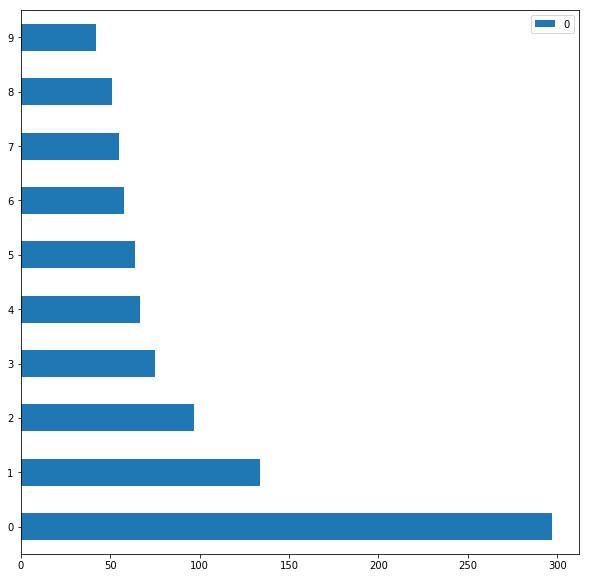

In [38]:
# Diet
split_diet = final_df.loc[final_df['label']==0, :]['clean_title'].str.split()
bag_of_words_diet = []
for value in split_diet:
    bag_of_words_diet = bag_of_words_diet + value
print('Diet word count length :', len(bag_of_words_diet))

# Exercise
split_exercise = final_df.loc[final_df['label']==1, :]['clean_title'].str.split()
bag_of_words_exercise = []
for value in split_exercise:
    bag_of_words_exercise = bag_of_words_exercise + value
print('Exercise word count length :', len(bag_of_words_exercise))

#display('Diet word count length:', sortFreqDict(wordListtoFreqDict(bag_of_words_diet))[0:50])
#display('Exercise word count length:', sortFreqDict(wordListtoFreqDict(bag_of_words_exercise))[0:50])

common_word_diet = pd.DataFrame(sortFreqDict(wordListtoFreqDict(bag_of_words_diet))[0:10])
common_word_diet.plot(figsize= (10,10),kind = 'barh')                        
                                

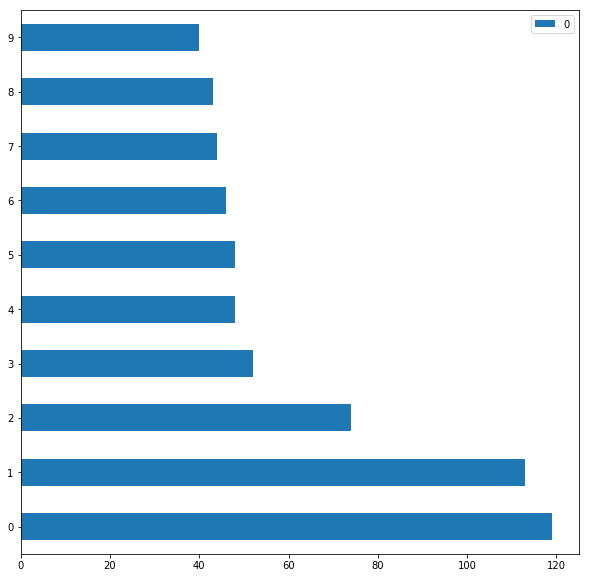

In [39]:
common_word_exercise = pd.DataFrame(sortFreqDict(wordListtoFreqDict(bag_of_words_exercise))[0:10])
common_word_exercise.plot(figsize= (10,10),kind = 'barh')

### Stemming and Lemmatizing

In [40]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [41]:
# Instantiating
p_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()



### Lemmatizing 'title' and 'selftext' column
We are Lemmatizing only two columns as these are the ones which has text that helps us to classify.
Lemmatizer lemmatize the words to its basic form.

In [42]:
def lemmat(sentence):
    token_words = word_tokenize(sentence)
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(lemmatizer.lemmatize(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
    

In [43]:
final_df['clean_title_lemmat'] = final_df.apply(lambda x:lemmat(x['clean_title']), axis =1)


In [44]:
final_df['clean_selftext_lemmat'] = final_df.apply(lambda x:lemmat(x['clean_selftext']), axis =1)


### Stemming 'title'and 'selftext' columns
Stemming also tokenize the word and bring into its base form. its cruder than lemmatizer. 

In [45]:
def porter(sentence):
    token_words = word_tokenize(sentence)
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(p_stemmer.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
    

In [46]:
final_df['clean_title_porter'] = final_df.apply(lambda x:porter(x['clean_title']), axis =1)


In [47]:
final_df['clean_selftext_porter'] = final_df.apply(lambda x:porter(x['clean_selftext']), axis =1)


In [48]:
final_df

title  \
0                              Join our Discord server!   
1     These sattvic foods are amazing to gain streng...   
2     You don’t need to eliminate gluten from your d...   
3                  How to lose the rest of my belly fat   
4     Can someone explain my curent 'diet' plan? ful...   
5     Diet tricks for easy LITTLE TO NO PREP Meals a...   
6                Podcast Episode 64 The Blood Type Diet   
7     My diet hacks: Intense flavors, a full stomach...   
8                                Spaghetti and lucozade   
9     I lost 6.3 kg in 1 month by eating 800 calorie...   
10    Just need advice on controlling hunger for my ...   
11    Potassium.. none of us are getting enough. So ...   
12                  Low Carb Chicken &amp; Tomato Salad   
13                 Is Intermittent Fasting a Good Idea?   
14    Is eating nutritious, healthy food kind of was...   
15                                   Dinner replacement   
16                               What am I doing wrong?   
17                                 Losing my motivation   
18                            What diet should I follow   
19    Diet no carbs no sugar or Diet without sugar a...   
20                        Inverted snack and meal times   
21    What does high protein, low sugar diet look li...   
22                           Low Carb Chocolate Brownie   
23    Why am I tired. (1000 calories a day to 3000 c...   
24    Improve my diet vs spending more time at the gym?   
25          Best way to lose some weight in just a week   
26                                              Vinegar   
27                 How to stop having fats in my diet ?   
28       Can I lose weight despite being a picky eater?   
29    Help: does anyone have a dessert recipe that d...   
30    Weight loss plateau: could artificial sweetene...   
31                                                  100   
32    Help: I feel like I'm doing everything right b...   
33         Lol u want fruit gummy. Come get it hahahaha   
34                          Which diet works (better) ?   
35    If you live alone, have no social life, and ca...   
36               Sudden calorie drop during keto - help   
37    A diet not centered around weight loss or bulk...   
38                             My Meal Plan Application   
39                                  Dietary Supplements   
40                                       Soda Questions   
41                                     Rice and protein   
42                 Podcast Episode 63 The Alkaline Diet   
43    Why are so many sources on the internet so par...   
44                             Another dumb question...   
45              Suggestions appreciated for weight loss   
46    Is peanut butter high in estrogen or testoster...   
47    Tahini hunger dip sauce, high quality dip I sp...   
48               Help ASAP calorie counting and anxiety   
49     what is a diet high in fiber?30 high fiber foods   
50    Is strawberry-bananna flavored yogurt bad for ...   
51    Looking for a diet to tighten up my midsection...   
52                          Calories in Alcohol vs food   
53               Weight Loss Plateau (Near 10% bodyfat)   
54                Looking for simple cheap "meal plan."   
55      What is the Best Diet for a Hypoglycemic Person   
56    LCHF and WFPB lot in common and completely opp...   
57                   I can't change my muscle/fat ratio   
58                         Is Lifesum Premium worth it?   
59                       Why has my weight loss ceased?   
60                        Help getting more protein in!   
61    what is the diet for acid reflux? and What not...   
62                  Going on keto and drinking alcohol?   
63    Mango banana almond chia seed smoothie bowl, i...   
64    What are some recommended snacks that don't ul...   
65                     my sugar addiction is killing me   
66    How Intermittent Fasting Can Be The Key To A L...   
67            Podcast Episode 62 The M

### Insights:
1. When we "stem" data, we take words and attempt to return a base form of the word. It tends to be cruder than using lemmatization
2. Lemmatizing is usually the more correct and precise way of handling things from a grammatical/morphological point of view, but also might not have much of an effect

### Dealing with rows after cleaning and lemmatizing

In [49]:
final_null = final_df[final_df.isna().any(axis = 1)]
final_null

Empty DataFrame
Columns: [title, selftext, label, clean_title, clean_selftext, clean_title_lemmat, clean_selftext_lemmat, clean_title_porter, clean_selftext_porter]
Index: []

In [50]:
display(final_df[final_df['clean_title'].str.len()<1])

title                                           selftext  \
260         What do i do?  I’m always never full and always want to eat m...   
429     If not now, when?  Hearing how long it’d take to lose weight make...   
1351  Which should I do??                                Which should I do??   

      label clean_title                                     clean_selftext  \
260       0              always never full always want eat never get mo...   
429       0              hearing long take lose weight makes want give ...   
1351      1                                                                  

     clean_title_lemmat                              clean_selftext_lemmat  \
260                      always never full always want eat never get mo...   
429                      hearing long take lose weight make want give r...   
1351                                                                         

     clean_title_porter                              clean_selftext_porter  
260                      alway never full alway want eat never get moti...  
429                      hear long take lose weight make want give real...  
1351

In [51]:
display(final_df[final_df['clean_selftext'].str.len()<1])

title             selftext  \
347   Do I have to eat low carb in order to lose wei...                    ?   
1351                                Which should I do??  Which should I do??   

      label                     clean_title clean_selftext  \
347       0  eat low carb order lose weight                  
1351      1                                                  

                   clean_title_lemmat clean_selftext_lemmat  \
347   eat low carb order lose weight                          
1351                                                          

                   clean_title_porter clean_selftext_porter  
347   eat low carb order lose weight                         
1351

### Insights:
We can see the rows 260, 347, 429 and 1351 had no word in the clean_title and clean_selftext after cleaning as it removed all the stopwords and ? character. Its better to drop this rows. 

In [52]:
# Dropping the rows with index 260,347,429,1351
final_df = final_df.drop(final_df.index[[260,347,429,1351]])

In [53]:
#check
display(final_df[final_df['clean_title'].str.len()<1])

Empty DataFrame
Columns: [title, selftext, label, clean_title, clean_selftext, clean_title_lemmat, clean_selftext_lemmat, clean_title_porter, clean_selftext_porter]
Index: []

In [54]:
#check
display(final_df[final_df['clean_selftext'].str.len()<1])

Empty DataFrame
Columns: [title, selftext, label, clean_title, clean_selftext, clean_title_lemmat, clean_selftext_lemmat, clean_title_porter, clean_selftext_porter]
Index: []

## Creating Word Cloud:

In [293]:
#pip install wordcloud

## the diet and exercise word will be removed before modelling.

In [55]:
# Join all selftext
diet = " ".join(review for review in final_df[final_df['label'] == 0]['clean_selftext'])
exercise = " ".join(review for review in final_df[final_df['label'] == 1]['clean_selftext'])

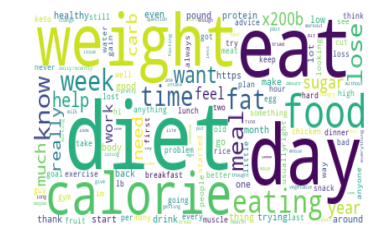

In [56]:
# Create and generate a word cloud image:
wordcloud_diet = WordCloud(collocations = False,
                           background_color = 'white', max_words = 150).generate(diet)
# Display the generated image
plt.imshow(wordcloud_diet, interpolation = 'bilinear', aspect = 'auto')
plt.axis("off")
## Store to file
plt.savefig("diet_word_cloud.png", format = "png")
plt.show()

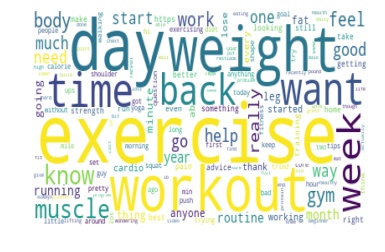

In [57]:
# Create and generate a word cloud image:
wordcloud_exercise = WordCloud(collocations = False,
                           background_color = 'white', max_words = 150).generate(exercise)
# Display the generated image
plt.imshow(wordcloud_exercise, interpolation = 'bilinear', aspect = 'auto')
plt.axis("off")
## Store to file
plt.savefig("exercise_word_cloud.png", format = "png")
plt.show()

#### Save it in a csv file

In [58]:
final_df.to_csv('final_df.csv', encoding = 'utf-8', index_label = False)